# Fund18. 딥러닝 들여다보기

## 신경망이란 무엇일까?  
>우리 뇌 속의 신경망 구조에 착안해서 퍼셉트론(Perceptron)이라는 형태를 제안하며 이를 연결한 형태를 인공신경망이라 부르기 시작했다.

## 딥러닝 프레임워크를 이용한 MNIST 이미지 분류

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터 로드
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1] * x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1] * x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 layer perceptron
model = keras.models.Sequential()
# 입력층 dim = 784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784, )))
# 출력층 레이어 K=10
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5030 - accuracy: 0.8814
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2328 - accuracy: 0.9349
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1818 - accuracy: 0.9481
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1517 - accuracy: 0.9569
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1309 - accuracy: 0.9623
Epoc

가장 기본적인 신경망 형태인 다층 퍼셉트론(Multi-Layer Perceptron; MLP)만을 이용해 간단히 구현해 보았다.  
인공신경망의 실제 구현 원리를 보다 명확하게 이해하기 위해, 프레임워크 내부에서 일어나는 일을 Numpy를 활용해 직접 구현하면서 이해해보자.


우선 각 레이어에 대해서 알아보자.  
입력값이 있는 입력층, 최종 출력값이 있는 출력층, 그리고 그 사이에 은닉층이 있다. 입력층과 출력층 사이에 몇 개의 층이 존재하든 모두 은닉층으로 부른다.  
인공신경망 중에서도 2개 이상의 레이어를 쌓아서 만든 것을 MLP라고 부르며, 은닉층이 많아질수록 인공신경망이 `DEEP`해졌다고 표현한다.  
딥러닝은 인공신경망이 `DEEP`해졌다는 뜻에서 나온 용어로, 딥러닝은 충분히 깊은 인공신경망을 활용해 `DNN(Deep Neural Network)`라고 부른다.  
>Fully-Connected Neural Network는 MLP의 다른 용어다. Fully-Connected Neural Network는 서로 다른 층에 위치한 노드 간에는 연결 관계가 존재하지 않으며, 인접한 층에 위치한 노드들 간의 연결만 존재한다는 의미를 내포한다.

## Parameter, Weight
입력층과 은닉층, 은닉층과 출력층 사이에는 각각 행렬이 존재한다. 이 행렬들을 parameter 혹은 weight라고 부른다. 두 단어는 보통 같은 뜻으로 사용되나, 실제로 parameter에는 bias 노드도 포함된다는 점을 유의하자. 위에서 간단히 만들었던 MLP 기반 딥러닝 모델을 Numpy로 다시 만들어보자.

In [2]:
# 입력층 데이터 shape
print(x_train_reshaped.shape)

# x_train_reshaped의 데이터 5개 출력
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [3]:
weight_init_std = 0.1
input_size = 784
hidden_size = 50

# 인접 레이어 간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
# bias 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

# 은닉층 출력
a1 = np.dot(X, W1) + b1

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [4]:
# 첫 번째 데이터의 은닉층 출력 확인
a1[0]

array([ 1.85352469e-01,  1.47651328e+00, -1.37089749e+00, -1.53194501e+00,
       -2.04384381e-01, -3.11795403e-01, -6.11036882e-01,  4.54173264e-01,
       -4.59438315e-01,  6.00292365e-01, -9.07248587e-01, -9.67503991e-01,
        4.79501302e-01,  1.74732348e+00, -4.21523313e-01,  3.39874708e-01,
        3.81062585e-01, -1.01058437e+00,  7.88049258e-02,  1.66262787e-01,
       -7.63129613e-02, -1.78312797e-01, -1.40750630e+00,  7.42561748e-02,
       -7.38228091e-01, -7.30194124e-01,  6.73169227e-01, -1.01170689e+00,
        2.26526226e-04, -1.42851901e+00,  1.98295661e-01, -1.15166064e+00,
       -2.73376384e-01,  1.16873815e+00,  6.97467848e-01,  1.12194802e-01,
        7.01627761e-01, -4.99008377e-01,  4.36111877e-01, -8.34483245e-01,
       -5.34873744e-01,  4.49183420e-01, -2.94107964e-02,  2.03101793e-01,
        6.90868300e-01,  1.34608885e-01,  3.22423416e-01, -5.39147336e-01,
       -1.13582001e+00, -9.40688731e-02])

## 활성화 함수 (Activation Functions)
딥러닝에서는 활성화 함수의 존재가 필수적이다. 활성화 함수는 보통 비선형 함수를 사용하는데, 이 비선형 함수를 MLP 안에 포함시키면서 모델의 표현력이 좋아지게 된다.

### Sigmoid

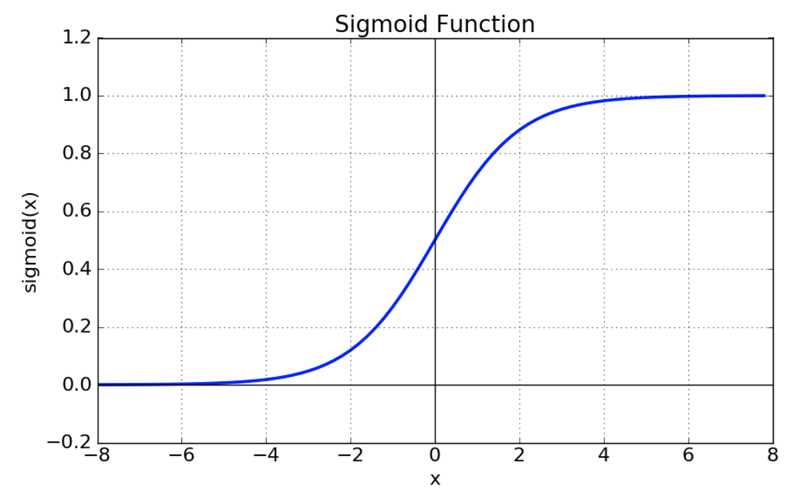  
[출처 : https://reniew.github.io/12/ ]

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

z1 = sigmoid(a1)
print(z1[0])

[0.54620591 0.81404535 0.20247488 0.17770929 0.44908103 0.42267656
 0.35182271 0.61163101 0.38711908 0.64572319 0.28756319 0.27537829
 0.61763011 0.8516149  0.39615229 0.58416009 0.59412936 0.2668655
 0.51969104 0.54147021 0.48093101 0.45553954 0.19662768 0.51855552
 0.32339173 0.32515213 0.66221244 0.26664594 0.50005663 0.19332954
 0.54941211 0.24018589 0.43207839 0.76291685 0.66762612 0.52801932
 0.66854857 0.37777373 0.60733218 0.30269795 0.36938088 0.61044507
 0.49264783 0.55060162 0.66616006 0.5336015  0.57991474 0.36838596
 0.24308864 0.47650011]


예전부터 활성화 함수로 많이 쓰던 sigmoid 함수다. 현재는 ReLU 함수를 더 많이 사용하는데 이유는 다음과 같다.  
- vanishing gradient 현상 발생
- exp 함수 사용시 비용이 크다.  

>vanishing gradient  
sigmoid 함수의 경우 출력 값이 1 아래이기 때문에 작은 수끼리 계속 곱하면서 연산했을 때 값이 0에 가까워지는, 기울기 소멸 문제가 빠르게 일어난다.  
기울기가 거의 0으로 소멸되면 네트워크의 학습은 매우 느려지고, 학습이 다 이루어지지 않은 상태에서 멈출 것이다. local minimum에 빠졌다고 표현하기도 한다.

### Tanh

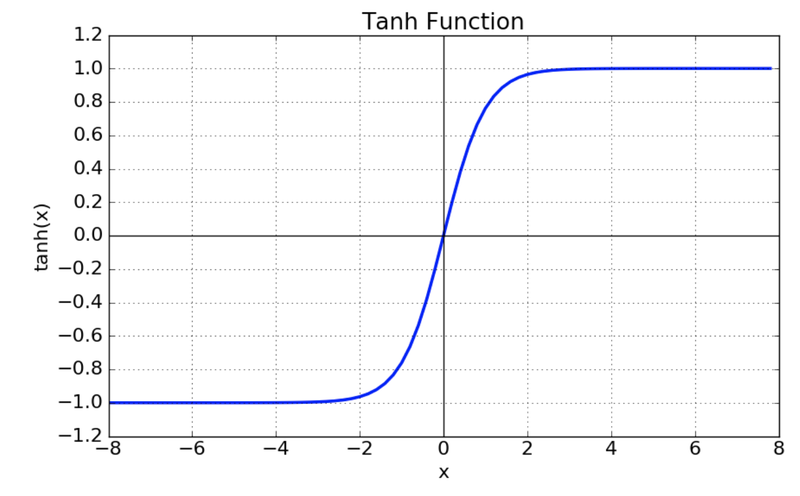  
[출처 : https://reniew.github.io/12/ ]  

- tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결
- vanishing gradient 현상 발생

### ReLU

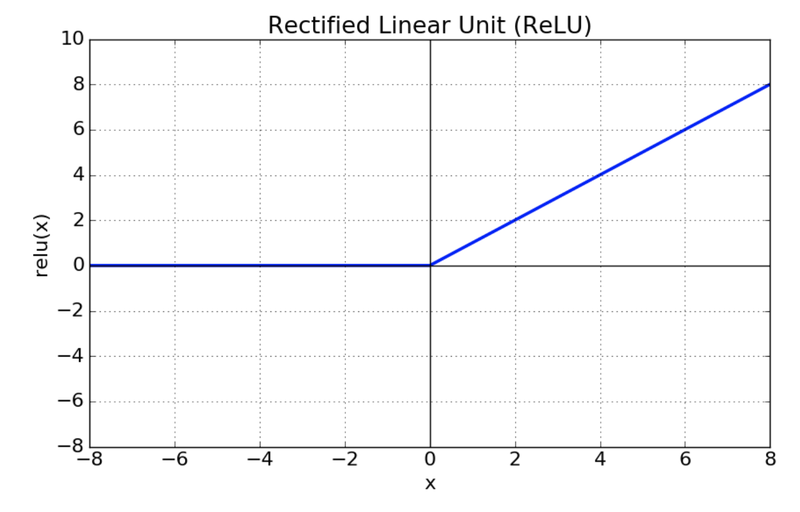
[출처 : https://reniew.github.io/12/ ]  

- sigmoid, tanh 함수에 비해 학습이 빠르다. 
- 연산 비용이 크지 않고, 구현이 매우 간단하다.

sigmoid 다음에 다시 Dense 레이어가 있다. 이는 출력 노드 개수만 다를 뿐 동일한 구조다. 

In [6]:
# 단일 레이어 구현
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

In [7]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 최종 출력이 output_size만큼의 벡터
print(a2[0])

[ 0.57617306  0.09549575  0.19506925  0.82687073  0.15972011 -0.46646064
  0.61745834 -0.32590132  0.84931212 -0.1926343 ]


모델의 최종 출력인 `a2`에 softmax 함수를 적용해보자. 그러면 모델의 출력은 입력 `X`가 10가지 숫자 중 하나일 확률로 가공된다.

In [8]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    
    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [9]:
y_hat = softmax(a2)
y_hat[0]  # 10개 숫자 중 하나일 확률

array([0.12781473, 0.07903608, 0.08731113, 0.1642319 , 0.08427867,
       0.04505789, 0.13320204, 0.0518579 , 0.16795916, 0.05925051])

## 손실 함수 (Loss Functions)
비선형 활성화 함수를 가진 여러 개의 은닉층을 거친 다음 신호 정보들은 출력층으로 전달된다. 이 때 원하는 정답과 전달된 신호 정보들 사이의 차이를 계산하고, 이 차이를 줄이기 위해 각 파라미터를 조정하는 것이 딥러닝의 전체적인 학습 흐름이다. 이 차이를 구하는데 사용하는 함수를 손실함수 혹은 비용함수라고 부른다.  
대표적으로 다음과 같은 두 가지 손실함수가 있다.

### 평균 제곱 오차 (MSE : Mean Squared Error)
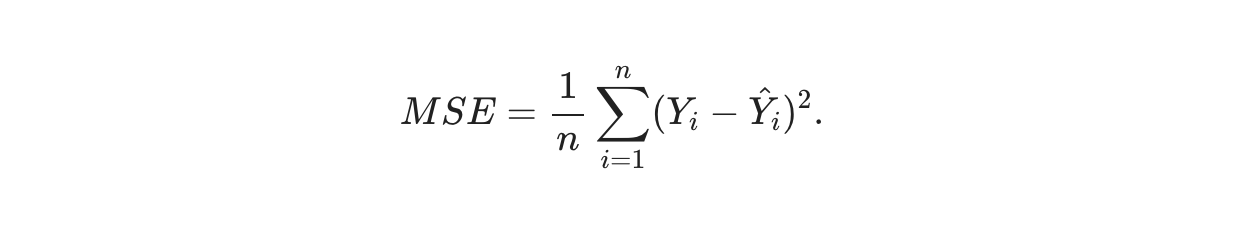

### 교차 엔트로피 (Cross Entropy)
Cross Entropy는 두 확률분포 사이의 유사도가 클수록 작아지는 값이다. 아직 거의 학습되지 않은 현재의 모델이 출력하는 softmax 값은 숫자 각각의 확률이 대부분 0.1 근처를 오가는 정도다. 모델을 학습하게 되면, 점점 정답에 가까워지게 된다. 우선은 정답과 비교해보자. 


In [10]:
# 정답 라벨을 one-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t  # 정답 라벨의 one-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
print(y_hat[0])
print(t[0])

[0.12781473 0.07903608 0.08731113 0.1642319  0.08427867 0.04505789
 0.13320204 0.0518579  0.16795916 0.05925051]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 라벨의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.6129353452389354

## 경사하강법 (Gradient Descent)
오차를 구했으니, 이제 오차를 줄이는 것이 목표다. 이 상황은 우리가 산꼭대기에 서 있는 것과 동일하게 생각할 수 있다.  
경사하강법은 각 단계에서의 기울기를 구해서 해당 기울기가 가리키는 방향으로 이동하는 방법이다.  
여기서 학습률(learning rate)이라는 개념을 도입해 기울기 값과 이 학습률을 곱한만큼만 발걸음을 내딛는다. 
또한, 학습률을 잘 정했다고 해도 어디서부터 출발했느냐에 따라 산 아래로 내려가는 시간이 달라질 수 있다. 이는 파라미터 초기화 문제와 맞닿아 있다.  

우리는 파라미터 W의 변화에 따른 오차의 변화량을 구하려고 한다. 그러면 오차 기울기가 커지는 방향의 반대 방향으로 파라미터를 조정해주면 된다. 단, 조정을 너무 많이 해주면 안 되기 때문에 적절한 학습률이 필수적이다.

In [13]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy # softmax의 출력으로 loss를 미분한 값

array([[ 0.02556295,  0.01580722,  0.01746223,  0.03284638,  0.01685573,
        -0.19098842,  0.02664041,  0.01037158,  0.03359183,  0.0118501 ],
       [-0.17886661,  0.01775751,  0.02071773,  0.03232737,  0.01932146,
         0.01159957,  0.02532602,  0.00979455,  0.02766502,  0.01435739],
       [ 0.02027053,  0.01422396,  0.0182408 ,  0.03139719, -0.17916   ,
         0.01382279,  0.02614038,  0.01061427,  0.03265695,  0.01179312],
       [ 0.02292722, -0.18871641,  0.02120927,  0.03276009,  0.01795365,
         0.00946891,  0.02527426,  0.01006138,  0.03600152,  0.0130601 ],
       [ 0.02247166,  0.01146637,  0.01924101,  0.02853385,  0.0202779 ,
         0.01051587,  0.02749549,  0.0116548 ,  0.03320333, -0.18486028]])

In [14]:
dW2 = np.dot(z1.T, dy)
dW2

array([[-0.0122467 , -0.11236227,  0.03564451,  0.05675438, -0.03372065,
        -0.01258417,  0.04668602,  0.01879446,  0.05994105, -0.04690662],
       [-0.09310414, -0.08641842,  0.0653089 ,  0.10583491, -0.02588059,
        -0.10265187,  0.08754008,  0.03502993,  0.10840032, -0.09405912],
       [-0.09901522, -0.10550095,  0.05840267,  0.09295841, -0.01617179,
        -0.03992801,  0.07686453,  0.03082824,  0.09534629, -0.09378417],
       [-0.03894275, -0.08278458,  0.05635036,  0.09285122, -0.07750015,
        -0.10471745,  0.07635428,  0.03052868,  0.09577456, -0.04791418],
       [-0.09167916, -0.04005324,  0.05466537,  0.08944835, -0.08818813,
        -0.06948838,  0.07367363,  0.02944008,  0.09044141, -0.04825992],
       [-0.01859782, -0.07004857,  0.03174767,  0.05003421, -0.03148486,
         0.00146422,  0.04207144,  0.01706086,  0.05297371, -0.07522086],
       [-0.0993774 , -0.00333425,  0.05350454,  0.08602144, -0.07436401,
        -0.03549447,  0.07255606,  0.0292548 

같은 방식으로 우리가 학습해야 할 파라미터 W1, b1, W2, b2에 대한 기울기를 모두 얻을 수 있다. 

In [15]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

중간에 sigmoid가 한 번 사용되었기에, 활성화 함수에 대한 gradient도 고려되어야 한다. 

In [16]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [17]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

파라미터를 업데이트하는 함수를 생각해보자. learning_rate도 고려해야 한다.

In [18]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

## 오차역전파 (Backpropagation)
MLP를 학습시키기 위한 입반적인 알고리즘 중 하나로, 출력층의 결과와 target과의 차이를 구한 뒤, 그 오차 값을 각 레이어들을 지나며 역전파해 각 노드가 가진 변수를 갱신한다.

In [19]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

정리된 내용을 바탕으로 Forward Propagation과 Backward Propagation이 이루어지는 한 사이클을 아래와 같이 엮을 수 있을 것이다. 

In [20]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)

dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.07191589 0.123028   0.10758628 0.08981385 0.07184183 0.06070567
  0.04640776 0.08420231 0.2435316  0.10096682]
 [0.09120963 0.11612731 0.14747251 0.09202405 0.06856537 0.06593896
  0.05653369 0.09037115 0.18340103 0.08835631]
 [0.10332082 0.11338826 0.11793069 0.08803409 0.0933749  0.06055154
  0.05389562 0.08632054 0.18701224 0.0961713 ]
 [0.0716857  0.11826469 0.11014391 0.11138356 0.0841159  0.07548642
  0.05969606 0.09456766 0.16889834 0.10575776]
 [0.08618546 0.13262451 0.11720037 0.10013702 0.08609813 0.0763453
  0.05666968 0.1148439  0.12545938 0.10443624]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.392290866356361


## 모델 학습 Step-by-Step
파라미터 업데이트 과정을 다섯 스텝만 반복해보면서 그 효과를 확인해보자.

In [21]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('----------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [22]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

----------
[[0.10158565 0.14133342 0.14791629 0.04503541 0.04718296 0.07619274
  0.11786718 0.13297718 0.08545397 0.10445521]
 [0.09695031 0.12882074 0.16279856 0.05408894 0.05006218 0.07757848
  0.10689444 0.11465536 0.07537554 0.13277546]
 [0.12011263 0.09668407 0.12379674 0.05624938 0.0658509  0.1007685
  0.09701313 0.11646215 0.11046866 0.11259384]
 [0.08995183 0.1071262  0.14102325 0.06385283 0.05244699 0.10262098
  0.102898   0.12284187 0.09521385 0.1220242 ]
 [0.09384004 0.10817253 0.12674152 0.0470438  0.06247299 0.11074987
  0.1017859  0.11948439 0.11301863 0.11669034]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.402077433948049
----------
[[0.12452875 0.15841397 0.11823196 0.04148251 0.05796086 0.09768526
  0.10017059 0.10959939 0.0739296  0.11799711]
 [0.12301704 0.14281538 0.12944937 0.04960854 0.06104777 0.09569385
  0.09040959 0.09373244 0.064

모델이 추론한 확률값 `y_hat`이 정답의 one-hot 인코딩 `t`값에 조금씩 접근하는 것과, Loss가 점점 감소하는 것을 확인할 수 있었다. 

## 추론 과정 구현과 정확도(Accuracy) 계산
방금 5번 학습한 파라미터를 가지고 숫자를 인식해보고, 정확도를 측정해보자.

In [23]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    
    return y

In [24]:
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.18171928, 0.18096865, 0.05749988, 0.02719859, 0.09308259,
       0.17141168, 0.05424405, 0.05624715, 0.04141455, 0.13621358])

In [25]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)
    
    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [26]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.18171928 0.18096865 0.05749988 0.02719859 0.09308259 0.17141168
 0.05424405 0.05624715 0.04141455 0.13621358]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.1


5번의 학습으로는 정확도가 11%밖에 되지 않는다. 전체 학습 사이클을 제대로 수행해보자.

## 전체 학습 사이클 수행

In [27]:
# 파라미터 초기화
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [28]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.306726313101623
train acc, test acc | 0.09736666666666667, 0.0982
Loss:  0.9327723169387468
train acc, test acc | 0.79375, 0.7977
Loss:  0.37937435335262265
train acc, test acc | 0.8783166666666666, 0.8804
Loss:  0.426656252395247
train acc, test acc | 0.8974666666666666, 0.9014
Loss:  0.43766070765056997
train acc, test acc | 0.9077333333333333, 0.9111
Loss:  0.2402062289653801
train acc, test acc | 0.9143166666666667, 0.9175
Loss:  0.3203227336747841
train acc, test acc | 0.9198666666666667, 0.9214
Loss:  0.41028333870428874
train acc, test acc | 0.9226833333333333, 0.9244
Loss:  0.2145815789644805
train acc, test acc | 0.9286833333333333, 0.9288
Loss:  0.19440308972250275
train acc, test acc | 0.93165, 0.9322
Loss:  0.2784952404422496
train acc, test acc | 0.93435, 0.9351
Loss:  0.15673069744391563
train acc, test acc | 0.9374666666666667, 0.9373
Loss:  0.1610573373703236
train acc, test acc | 0.93875, 0.94
Loss:  0.21844161134638324
train acc